In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
max_n = 70
prob = np.zeros(max_n+1)
total = 1
for n in range(2, max_n+1):
    total = total * (365-(n-1))/365
    prob[n] = 1 - total

In [3]:
prob

array([0.        , 0.        , 0.00273973, 0.00820417, 0.01635591,
       0.02713557, 0.04046248, 0.0562357 , 0.07433529, 0.09462383,
       0.11694818, 0.14114138, 0.16702479, 0.19441028, 0.22310251,
       0.25290132, 0.28360401, 0.31500767, 0.34691142, 0.37911853,
       0.41143838, 0.44368834, 0.47569531, 0.50729723, 0.53834426,
       0.5686997 , 0.59824082, 0.62685928, 0.65446147, 0.68096854,
       0.70631624, 0.73045463, 0.75334753, 0.77497185, 0.79531686,
       0.81438324, 0.83218211, 0.84873401, 0.86406782, 0.87821966,
       0.89123181, 0.90315161, 0.91403047, 0.92392286, 0.93288537,
       0.9409759 , 0.94825284, 0.9547744 , 0.96059797, 0.96577961,
       0.97037358, 0.97443199, 0.97800451, 0.98113811, 0.98387696,
       0.98626229, 0.98833235, 0.99012246, 0.99166498, 0.99298945,
       0.99412266, 0.9950888 , 0.99590957, 0.99660439, 0.99719048,
       0.99768311, 0.9980957 , 0.99844004, 0.99872639, 0.99896367,
       0.99915958])

Text(0.5, 1.0, 'at least two people sharing a birthday')

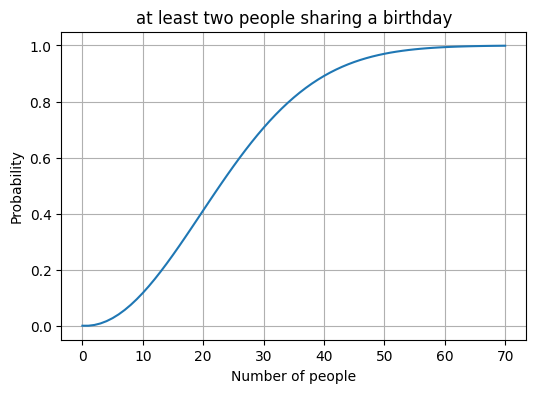

In [4]:
fig = plt.subplots(figsize=(6,4))
plt.plot(prob)

plt.grid()
plt.xlabel('Number of people')
plt.ylabel('Probability')
plt.title('at least two people sharing a birthday')

### 効用関数

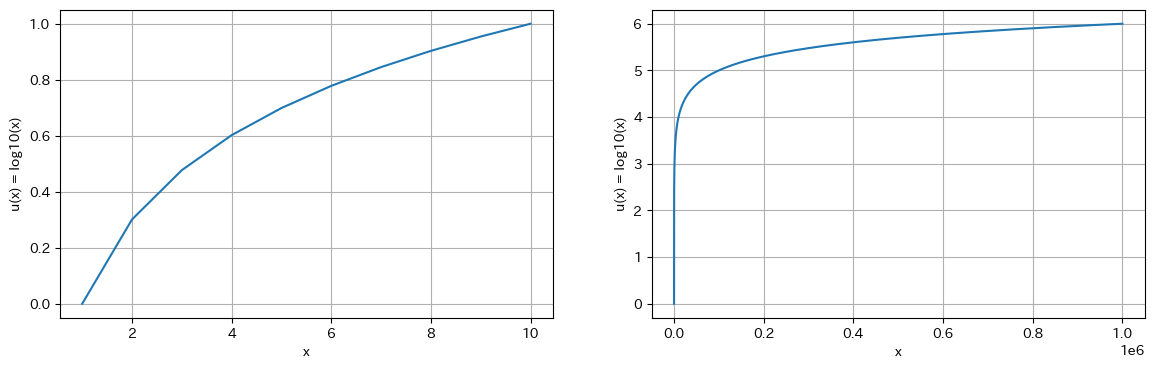

In [5]:
import japanize_matplotlib

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
x = range(1, 10**6+1)
u = np.log10(x)
ax[0].plot(range(1, 11), np.log10(range(1, 11)))
ax[0].set_xlabel('x')
ax[0].set_ylabel('u(x) = log10(x)')
ax[0].grid()

ax[1].plot(x, u)
ax[1].set_xlabel('x')
ax[1].set_ylabel('u(x) = log10(x)')
ax[1].grid()

plt.show()

### リスク態度と期待効用

$$y_2 = \frac{1}{2}\sqrt{100+1.5x}+\frac{1}{2}\sqrt{100-x}$$

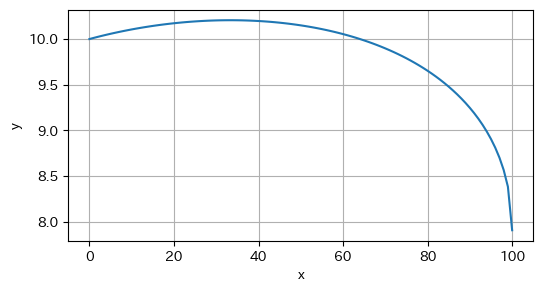

In [6]:
x = np.arange(0, 101)
y = 0.5*(np.sqrt(100+1.5*x)+np.sqrt(100-x))
fig = plt.subplots(figsize=(6, 3))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)

sympyがimportできない...何故？<br>
poetryでaddしても、pip installしてもsympyをimportできず...<br>

maxの値を取ってくるのはsympy使わずにできる


In [16]:
y = y.tolist()
x[y.index(max(y))]

33

### プロスペクト理論
アレのパラドックス、全然自分に当てはまらないので面白くない.

**確率過重関数**<br>
$$ w(p)= \frac{p^\gamma}{(p^\gamma + (1-p)^\gamma)^\frac{1}{\gamma}} $$

In [17]:
def pwfun(p, g):
    return p**g/pow(p**g+(1-p)**g, 1/g)

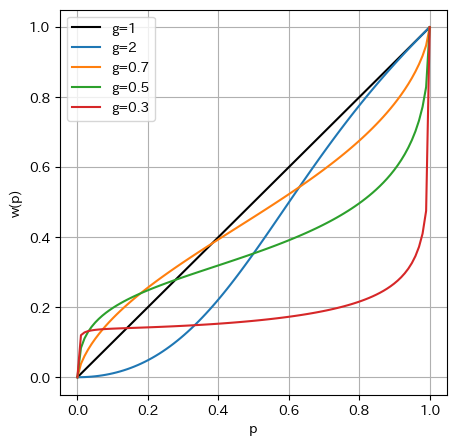

In [20]:
p = np.linspace(0.0, 1.0, 100)
w1 = pwfun(p, 1)
w2 = pwfun(p, 2)
w09 = pwfun(p, 0.9)
w08 = pwfun(p, 0.8)
w07 = pwfun(p, 0.7)
w06 = pwfun(p, 0.6)
w05 = pwfun(p, 0.5)
w03 = pwfun(p, 0.3)



fig = plt.subplots(figsize=(5,5))
plt.plot(p, w1, label="g=1", color='k')
plt.plot(p, w2, label="g=2")
plt.plot(p, w07, label="g=0.7")
plt.plot(p, w05, label="g=0.5")
plt.plot(p, w03, label="g=0.3")

plt.legend()
plt.grid()
plt.xlabel('p')
plt.ylabel('w(p)')
plt.show()

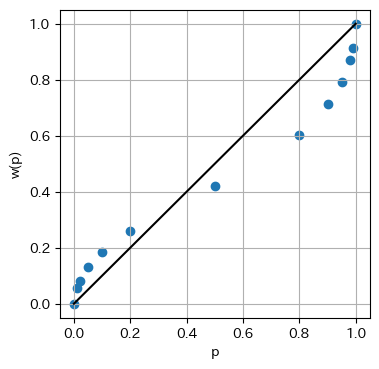

In [21]:
prob_a = np.array([0, 1, 2,5, 10, 20, 50, 80, 90, 95, 98, 99, 100])
prob_s = np.array([0, 5.5, 8.1, 13.2, 18.6, 26.1, 42.1, 60.1, 71.2, 79.3, 87.1, 91.2, 100])
prob_an = prob_a/100
prob_sn = prob_s/100
p = np.linspace(0.0, 1.0, 100)

fig = plt.subplots(figsize=(4,4))
plt.scatter(prob_an, prob_sn)
plt.plot(p, p, color='k')
plt.grid()
plt.xlabel('p')
plt.ylabel('w(p)')
plt.show()

### アンカリング効果

In [25]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd

In [24]:
np.random.seed(123)
num = 100
mean_l, std_l = 3, 2.0
bias_l = 0.5
mean_h, std_h = 5, 3.0
# locに平均値、scaleに標準偏差を指定
xl = stats.norm.rvs(loc=mean_l+bias_l, scale=std_l, size=num)
xh = stats.norm.rvs(loc=mean_h, scale=std_h, size=num)

In [28]:
df = pd.DataFrame({'L':xl, 'H':xh})
print(df.shape)
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
df = df.melt(var_name='class', value_name='data')
print(df.shape)
df.head()

(100, 2)
(200, 2)


,class,data
0,L,1.328739
1,L,5.494691
2,L,4.065957
3,L,0.487411
4,L,2.342799


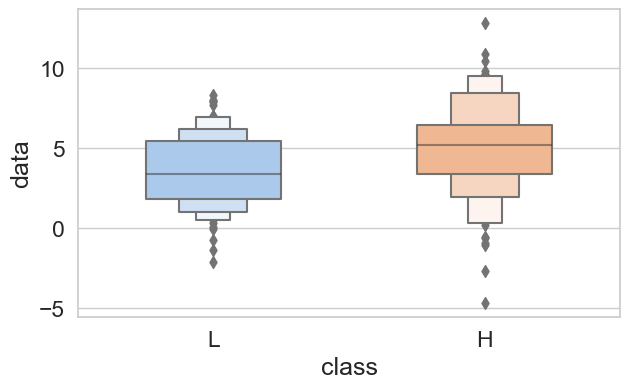

In [29]:
sns.set_theme(style='whitegrid', font_scale=1.5)
plt.figure(figsize=(7, 4))
sns_boxplot = sns.boxenplot(x='class', y='data', data=df, width=0.5, palette='pastel')

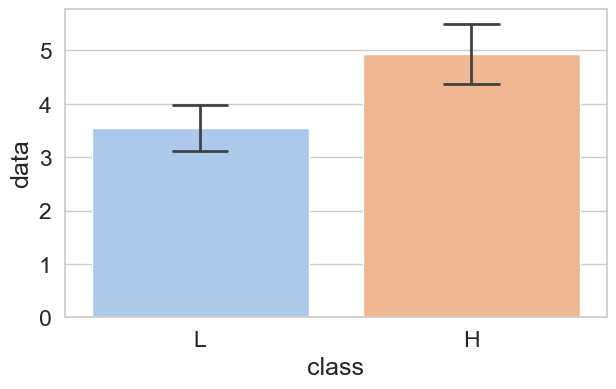

In [30]:
plt.figure(figsize=(7,4))
sns_barplot = sns.barplot(x='class', y='data', data=df, capsize=0.2, errwidth=2.0, 
                          palette='pastel')

<Figure size 1200x400 with 0 Axes>

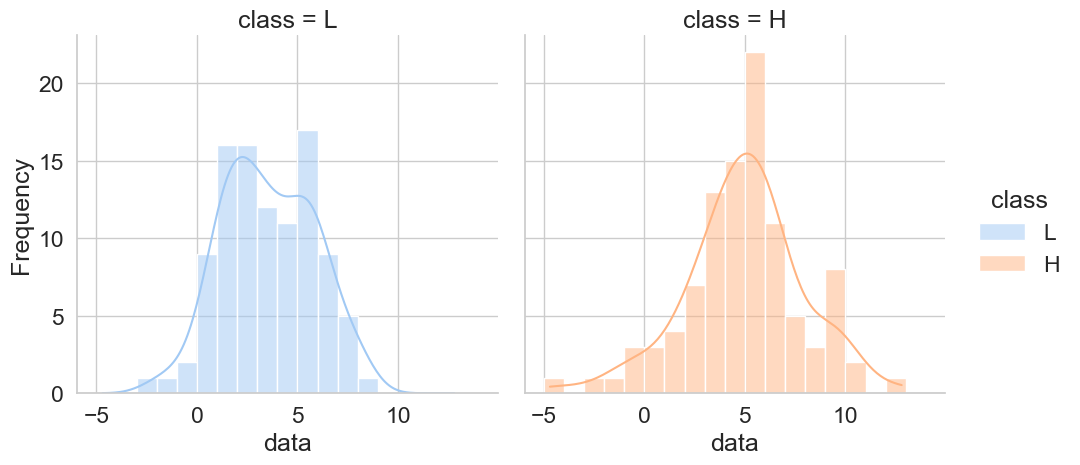

In [34]:
plt.figure(figsize=(12,4))
sns_displot = sns.displot(data=df, x='data', hue='class', col='class', 
                          bins=range(-5, 15, 1), kde=True, palette='pastel')
sns_displot.set_ylabels('Frequency')

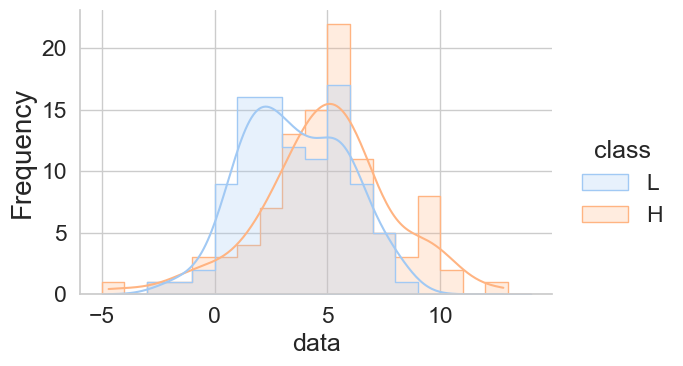

In [32]:
# elementは何?
g = sns.displot(data=df, x='data', hue='class', bins=range(-5,15,1), element='step',
                kde=True, palette='pastel', height=4, aspect=1.5)
g.set_ylabels('Frequency', fontsize=20)

### ベイズ推定

オオカミ少年から数理的な問題を出す()<br>
P(X|Y)などの変数名の付け方がむずかしい

In [35]:
np.random.seed(123)
py_x, pnyx = 1/3, 2/3
py_nx, p_ny_nx = 3/4, 1/4